# 1. Clasificación de carpetas por patología

# 2 Preparación CARPETAS

In [2]:
import os

# Lista de carpetas donde están las imágenes
folders = ["NV1", "MEL1","VAS1"]

# Contar archivos en cada carpeta
for folder in folders:
    folder_path = os.path.join(os.getcwd(), folder)  # Ruta completa
    if os.path.exists(folder_path):  # Verificar si la carpeta existe
        num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        print(f"📂 {folder}: {num_files} imágenes")
    else:
        print(f"⚠️ La carpeta {folder} no existe")

📂 NV1: 516 imágenes
📂 MEL1: 252 imágenes
📂 VAS1: 252 imágenes


In [3]:
#Crear carpetas para hacer el set de datos

import os

# Definir las carpetas a crear
base_folder = "datasetPruebaMEL_NV"
categories = ["NV", "MEL","VAS"]

# Crear la carpeta principal si no existe
if not os.path.exists(base_folder):
    os.makedirs(base_folder)
    print(f"📂 Carpeta creada: {base_folder}")
else:
    print(f"⚠️ La carpeta {base_folder} ya existe")

# Crear las subcarpetas para cada categoría
for category in categories:
    category_path = os.path.join(base_folder, category)
    if not os.path.exists(category_path):
        os.makedirs(category_path)
        print(f"📂 Subcarpeta creada: {category_path}")
    else:
        print(f"⚠️ La subcarpeta {category_path} ya existe")

📂 Carpeta creada: datasetPruebaMEL_NV
📂 Subcarpeta creada: datasetPruebaMEL_NV\NV
📂 Subcarpeta creada: datasetPruebaMEL_NV\MEL
📂 Subcarpeta creada: datasetPruebaMEL_NV\VAS


In [4]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#maximo 387 (el num. menor de imagenes que subi)

import shutil
carpeta_fuente = 'NV1'
carpeta_destino = 'datasetPruebaMEL_NV/NV'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 252:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [5]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#maximo 387 (el num. menor de imagenes que subi)

import shutil
carpeta_fuente = 'MEL1'
carpeta_destino = 'datasetPruebaMEL_NV/MEL'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 252:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [6]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#maximo 387 (el num. menor de imagenes que subi)

import shutil
carpeta_fuente = 'VAS1'
carpeta_destino = 'datasetPruebaMEL_NV/VAS'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 252:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [8]:
# Lista de carpetas donde están las imágenes
folders = ["datasetPruebaMEL_NV/NV", "datasetPruebaMEL_NV/MEL", "datasetPruebaMEL_NV/VAS"]

# Contar archivos en cada carpeta
for folder in folders:
    folder_path = os.path.join(os.getcwd(), folder)  # Ruta completa
    if os.path.exists(folder_path):  # Verificar si la carpeta existe
        num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        print(f"📂 {folder}: {num_files} imágenes")
    else:
        print(f"⚠️ La carpeta {folder} no existe")

📂 datasetPruebaMEL_NV/NV: 252 imágenes
📂 datasetPruebaMEL_NV/MEL: 252 imágenes
📂 datasetPruebaMEL_NV/VAS: 252 imágenes


Found 606 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


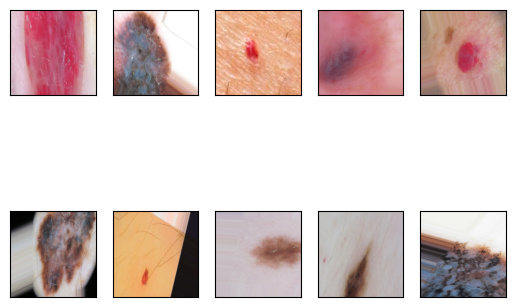

In [9]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2 #20% para pruebas
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('datasetPruebaMEL_NV', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('datasetPruebaMEL_NV', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

In [10]:
# Importaciones necesarias para usar Keras con TensorFlow 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Aquí van el resto de las importaciones necesarias para tu proyecto
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2

# Cargar MobileNetV2 como modelo base (sin usar TensorFlow Hub)
mobilenetv2_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [11]:
# Congelar las primeras capas del modelo base
mobilenetv2_base.trainable = False

In [13]:
# Crear un modelo de la red con MobileNetV2 como base
modelo = Sequential([
    mobilenetv2_base,
    GlobalAveragePooling2D(),
    Dense(3, activation='softmax')  # Nueva capa de salida
])


In [14]:
# Resumen del modelo
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [15]:
# Compilar el modelo utilizando la API de optimizadores de TensorFlow 2.x
modelo.compile(
    optimizer=Adam(learning_rate=0.0001),  # Ajuste de la tasa de aprendizaje para fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear generadores de datos para entrenamiento y validación
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% de las imágenes serán de validación
)

# Directorio con las imágenes
ruta_datos = "datasetPruebaMEL_NV"

# Generador para entrenamiento
data_gen_entrenamiento = datagen.flow_from_directory(
    ruta_datos,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Generador para validación
data_gen_pruebas = datagen.flow_from_directory(
    ruta_datos,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 606 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [41]:
# Fine-Tuning: Desbloquear las últimas capas de MobileNetV2
for layer in mobilenetv2_base.layers[-10:]:  # Ajustar el número de capas según el modelo
    layer.trainable = True

# Volver a compilar el modelo después de habilitar el fine-tuning
modelo.compile(
    optimizer=Adam(learning_rate=0.00005),  # Ajustar la tasa de aprendizaje para fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar el modelo
EPOCAS = 50
historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS,
    validation_data=data_gen_pruebas
)


Epoch 1/50
19/19 [==============================] - 39s 2s/step - loss: 0.1311 - accuracy: 0.9604 - val_loss: 0.2453 - val_accuracy: 0.9067
Epoch 2/50
19/19 [==============================] - 36s 2s/step - loss: 0.1560 - accuracy: 0.9472 - val_loss: 0.2683 - val_accuracy: 0.9267
Epoch 3/50
19/19 [==============================] - 38s 2s/step - loss: 0.1412 - accuracy: 0.9620 - val_loss: 0.1914 - val_accuracy: 0.9200
Epoch 4/50
19/19 [==============================] - 42s 2s/step - loss: 0.1599 - accuracy: 0.9455 - val_loss: 0.2210 - val_accuracy: 0.9267
Epoch 5/50
19/19 [==============================] - 40s 2s/step - loss: 0.1419 - accuracy: 0.9604 - val_loss: 0.1828 - val_accuracy: 0.9333
Epoch 6/50
19/19 [==============================] - 31s 2s/step - loss: 0.1406 - accuracy: 0.9571 - val_loss: 0.2161 - val_accuracy: 0.9200
Epoch 7/50
19/19 [==============================] - 35s 2s/step - loss: 0.1424 - accuracy: 0.9554 - val_loss: 0.1714 - val_accuracy: 0.9533
Epoch 8/50
19/19 [==

acc = [0.9603960514068604, 0.9471946954727173, 0.962046205997467, 0.9455445408821106, 0.9603960514068604, 0.9570956826210022, 0.9554455280303955, 0.9422442317008972, 0.9570956826210022, 0.962046205997467, 0.9471946954727173, 0.9537953734397888, 0.9537953734397888, 0.9653465151786804, 0.9686468839645386, 0.9570956826210022, 0.9653465151786804, 0.9471946954727173, 0.9702970385551453, 0.9653465151786804, 0.9587458968162537, 0.9570956826210022, 0.9702970385551453, 0.9521452188491821, 0.9554455280303955, 0.9686468839645386, 0.9554455280303955, 0.9554455280303955, 0.962046205997467, 0.9603960514068604, 0.9686468839645386, 0.9554455280303955, 0.9636963605880737, 0.9521452188491821, 0.9488449096679688, 0.9653465151786804, 0.9488449096679688, 0.9603960514068604, 0.9686468839645386, 0.9537953734397888, 0.9521452188491821, 0.9686468839645386, 0.9603960514068604, 0.9603960514068604, 0.9702970385551453, 0.9603960514068604, 0.9521452188491821, 0.9455445408821106, 0.9636963605880737, 0.95544552803039

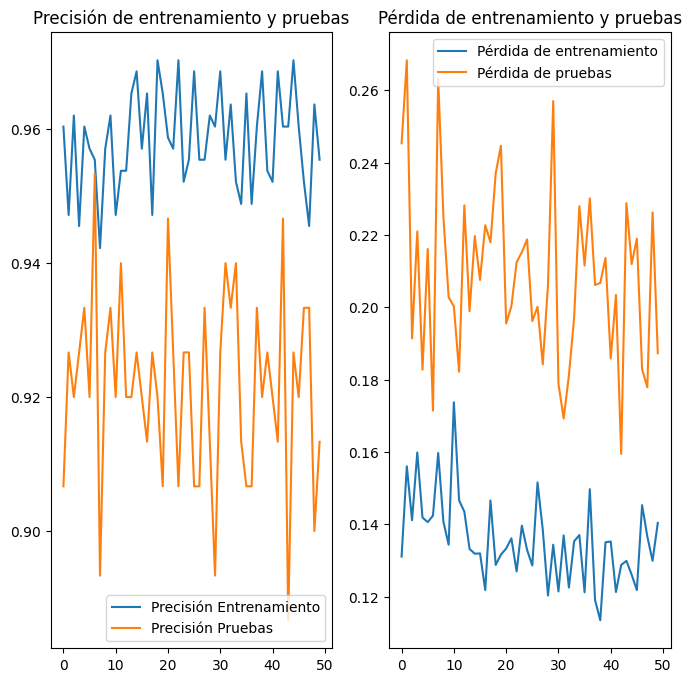

In [42]:
import os
import matplotlib.pyplot as plt
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(50)

print('acc = ' + str(acc) + ', val_acc = ' + str(val_acc) + ', loss = ' + str(loss) + ', val_loss = ' + str(val_loss))

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [19]:
import requests
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image
from io import BytesIO

# Lista de clases, en el orden en que el modelo las espera
clases = ['MEL', 'NV', 'VAS']

def categorizar(url):
    # Solicitar la imagen desde la URL
    respuesta = requests.get(url)
    img_array = np.array(bytearray(respuesta.content), dtype=np.uint8)
    img = cv2.imdecode(img_array, -1)
    
    # Procesar la imagen
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB si es necesario
    img = cv2.resize(img, (224, 224))  # Redimensionar la imagen para que se ajuste al tamaño de entrada del modelo
    img = img.astype(float) / 255.0  # Normalizar los valores de los píxeles entre 0 y 1
    
    # Realizar la predicción
    prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
    
    # Obtener el índice de la clase con la mayor probabilidad
    indice_prediccion = np.argmax(prediccion[0], axis=-1)
    
    # Devolver la clase correspondiente (en lugar del índice)
    return clases[indice_prediccion]


In [75]:
import numpy as np
#0 = MEL, 1 = NV, 2 = VAS
url = 'https://image.tuasaude.com/media/article/tx/qj/cancer-de-pele-melanoma_36837.jpg?width=686&height=487' #debe ser 2
prediccion = categorizar (url)
print(prediccion)

1/1 [==============================] - 0s 32ms/step
MEL
